# Housing Price Prediction

In [1]:
import pandas as pd

# Loading the dataset
file_path = 'Housing.csv'
housing_data = pd.read_csv(file_path)

## Data Inspection & Cleaning

In [2]:
# Display basic information about the dataset
housing_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### The data has 13 columns and 545 rows of values

In [3]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_data.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# Check for missing values or inconsistencies
missing_values = housing_data.isnull().sum()

In [6]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                       'airconditioning', 'prefarea', 'furnishingstatus']
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_columns, drop_first=True)

In [7]:
# Displaying summary of missing values and the transformed dataset structure
missing_values, housing_data_encoded.head()

(price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad            0
 guestroom           0
 basement            0
 hotwaterheating     0
 airconditioning     0
 parking             0
 prefarea            0
 furnishingstatus    0
 dtype: int64,
       price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
 0  13300000  7420         4          2        3        2          True   
 1  12250000  8960         4          4        4        3          True   
 2  12250000  9960         3          2        2        2          True   
 3  12215000  7500         4          2        2        3          True   
 4  11410000  7420         4          1        2        2          True   
 
    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
 0          False         False                False                 True   
 1          False         False                False                 True   
 2 

##### No missing data.
##### Categorical variables have been converted into numerical format using one-hot encoding. For example:
##### - mainroad_yes indicates if the house is on the main road.
##### - furnishingstatus_semi-furnished and furnishingstatus_unfurnished are additional flags for furnishing status.

## Feature Selection

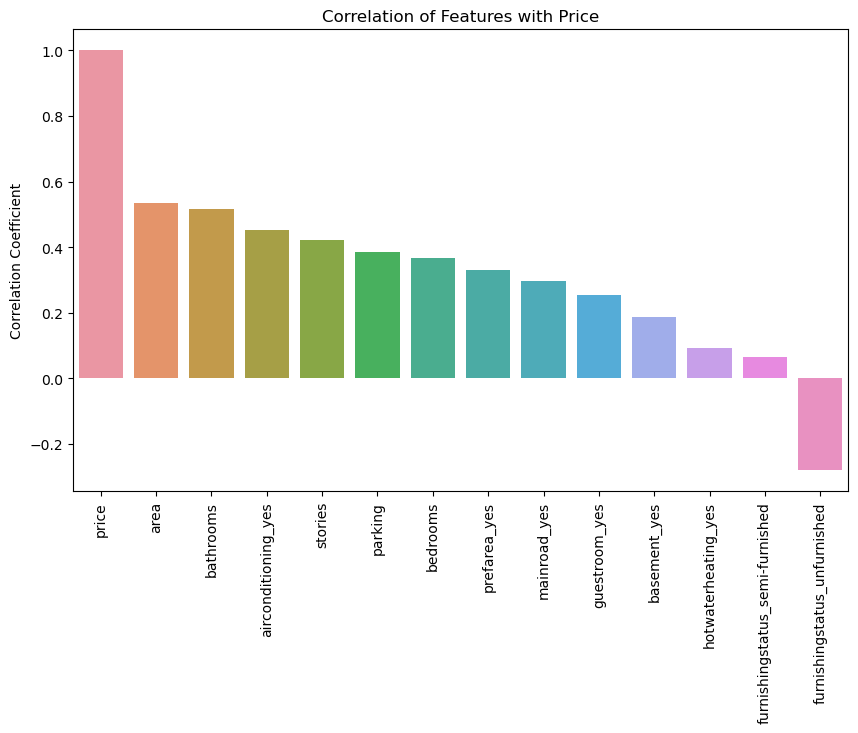

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing the correlation matrix
correlation_matrix = housing_data_encoded.corr()

# Extracting correlations with the target variable 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Visualizing the correlation of features with price
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlations.index, y=price_correlations.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Price')
plt.ylabel('Correlation Coefficient')
plt.show()

price_correlations

##### Feature Selection Insights
###### The features most strongly correlated with price are:

###### - area (0.54): Indicates property size; the strongest predictor of price.
###### - bathrooms (0.52): More bathrooms tend to increase price.
###### - airconditioning_yes (0.45): Air-conditioned houses are pricier.
###### - stories (0.42): More stories correlate positively with price.
###### - parking (0.38): Parking availability adds value.
###### - bedrooms (0.37): More bedrooms correlate with higher prices.
###### - prefarea_yes (0.33): Preferred areas increase price.
###### Features with weaker or negative correlation (e.g., furnishingstatus_unfurnished) may have less predictive power but could still provide context.
###### I Will then include all strongly correlated features and evaluate their impact during model training.

## Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features for the model
features = ['area', 'bathrooms', 'airconditioning_yes', 'stories', 'parking', 'bedrooms', 'prefarea_yes']
X = housing_data_encoded[features]
y = housing_data_encoded['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression Model Training

In [10]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1955050222747.25
R-squared: 0.6132113854476029


##### RMSE (RMSE= square root of MSE) is in the same units as the target variable suggesting better performance and close predictions.
##### The R² is closer to 1 than 0 meaning the model captures the relationships well.

## Visualization of Predictions vs. Actual Values

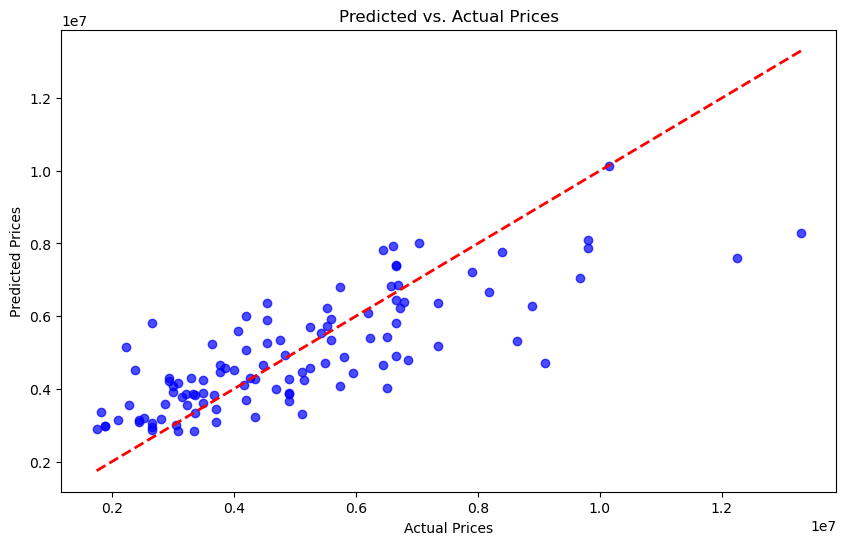

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

##### In General there are clusters near the diagonal red line indicating the model is accurate for these data points.
##### But in the small instances of outliers (points far from the line) we might conclude that these are points where the model struggles.